# Data preprocess

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os

tf.__version__

'2.5.0'

# Download and unzip datasets

In [2]:
# set to True to download and unzip datasets
do_download=False

if do_download:
    import requests
    import tarfile

    url_trainval = 'http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar'
    r = requests.get(url_trainval, allow_redirects=True)
    open('./data/VOCtrainval_06-Nov-2007.tar', 'wb').write(r.content)

    url_test = 'http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar'
    r = requests.get(url_test, allow_redirects=True)
    open('./data/VOCtest_06-Nov-2007.tar', 'wb').write(r.content)

    del r

    tar_train_val = tarfile.open('./data/VOCtrainval_06-Nov-2007.tar')
    tar_train_val.extractall('./data/')


    tar_test = tarfile.open('./data/VOCtest_06-Nov-2007.tar')
    tar_test.extractall('./data/')



# Data analysis

In [3]:
def load_classes_from_txt(file_path):
    
    file_name = os.path.basename(file_path)
    
    class_name = file_name.split('_')[0]
    
    df = pd.read_csv(file_path, sep='\s+| |  ', engine='python', 
                     header=None)
    
    df.columns = ['file_name', class_name]
    
    df.loc[df[class_name]==-1, class_name] = 0
    
    return df
    

In [4]:
# data = load_classes_from_txt('./data/VOCdevkit/VOC2007/ImageSets/Main/aeroplane_train.txt')
# data.head()

In [5]:
# file_name = os.path.basename('./data/VOCdevkit/VOC2007/ImageSets/Main/aeroplane_train.txt')
# file_name.split('_')[0]

In [6]:
def get_dataframe_with_classes_in_images(folder_path, which_set='train'):
    
    '''
    Returns DataFrame with class annotations for every image in chosen set.
    
    Args:
        folder_path -- path to folder containing .txt files with labels
        which_set -- 'train', 'trainval', 'val', 'test'
    '''
    
    for root, _, files in os.walk(folder_path):
        pass
    
    # create dataframes with file name column 
    df_all_classes = pd.read_csv(f'{root}{which_set}.txt', header=None, dtype=str)
    df_all_classes.columns = ['file_name']
    
    # loops through all file names in the folder
    for file_name in files:
        
        # exclude txt files without information about class apperance in a image
        if file_name not in ['train.txt', 'trainval.txt', 'val.txt', 'test.txt']:
            
            #  get information which of dataset's splits the file relates to
            ds_part = file_name.split('_')[1]
            
            file_path = root + file_name
            
            # function for getting dataframe from txt file
            df = load_classes_from_txt(file_path=file_path)
         
            # check if annotations are for images of chosen set
            if ds_part==(which_set+'.txt'):
                
                # statment check if columns are equal before concatenation
                if not df_all_classes['file_name'].astype('int').equals(df['file_name']):
                    print('File name columns are not equal!')
                
                df_all_classes = pd.concat([df_all_classes, df.iloc[:, 1]], axis=1)
            
            else:
                pass
            

     # get column names exluding 'file_name'
    cols = df_all_classes.columns.tolist()[1:]
        
    cols.sort()
    
    cols.insert(0, 'file_name')

    # rearrange columns order
    df_all_classes = df_all_classes[cols]
           
    return df_all_classes



In [7]:
folder_path = './data/VOCdevkit/VOC2007/ImageSets/Main/'

df_train = get_dataframe_with_classes_in_images(folder_path, which_set='train')
df_trainval = get_dataframe_with_classes_in_images(folder_path, which_set='trainval')
df_val = get_dataframe_with_classes_in_images(folder_path, which_set='val')

test_path = './data/VOCtest_06-Nov-2007/VOCdevkit/VOC2007/ImageSets/Main/'

df_test = get_dataframe_with_classes_in_images(test_path, 'test')

In [8]:
df_train

,file_name,aeroplane,bicycle,bird,boat,bottle,bus,car,cat,chair,...,diningtable,dog,horse,motorbike,person,pottedplant,sheep,sofa,train,tvmonitor
0,000012,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000017,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,000023,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,000026,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,000032,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,009944,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2497,009945,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2498,009949,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2499,009959,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_trainval

,file_name,aeroplane,bicycle,bird,boat,bottle,bus,car,cat,chair,...,diningtable,dog,horse,motorbike,person,pottedplant,sheep,sofa,train,tvmonitor
0,000005,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,000007,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,000009,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,000012,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,000016,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,009954,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
5007,009955,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5008,009958,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5009,009959,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_val

,file_name,aeroplane,bicycle,bird,boat,bottle,bus,car,cat,chair,...,diningtable,dog,horse,motorbike,person,pottedplant,sheep,sofa,train,tvmonitor
0,000005,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,000007,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,000009,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,000016,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,000019,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505,009947,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2506,009950,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2507,009954,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2508,009955,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_test

,file_name,aeroplane,bicycle,bird,boat,bottle,bus,car,cat,chair,...,diningtable,dog,horse,motorbike,person,pottedplant,sheep,sofa,train,tvmonitor
0,000001,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,000002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,000003,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,000004,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,000006,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4947,009956,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4948,009957,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4949,009960,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4950,009962,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


## Chart of labels amount per class

In [12]:
def display_graph_of_images_count(dataframe):
    
    ax = dataframe.plot(kind='bar', figsize=(20, 15), title='Images count per class',
                        xlabel='Class', ylabel='Count', legend=False, fontsize=12)
    
    ax.legend(fontsize=12)

    for i in range(len(dataframe.columns)):
        ax.bar_label(ax.containers[i], label_type='edge', rotation=90, fontsize=12, padding=3)

    ax.margins(y=0.1)

In [13]:

df_train_class_count = pd.DataFrame(df_train.sum().iloc[1:], columns=['train'])

df_val_class_count = pd.DataFrame(df_val.sum().iloc[1:], columns=['val'])

df_test_class_count = pd.DataFrame(df_test.sum().iloc[1:], columns=['test'])

# concat
df_class_count = pd.concat([df_train_class_count, df_val_class_count, df_test_class_count], axis=1)

# sum across train/val/test count
df_class_count['total']= df_class_count.sum(axis=1).astype('int')


In [14]:
df_class_count = df_class_count.sort_values(by=['total'], ascending=False)

In [15]:
df_class_count

,train,val,test,total
person,1025,983,2007,4015
car,376,337,721,1434
chair,224,221,417,862
dog,203,218,418,839
cat,163,174,322,659
bird,180,150,282,612
horse,139,148,274,561
train,127,134,259,520
tvmonitor,128,128,229,485
bicycle,116,127,239,482


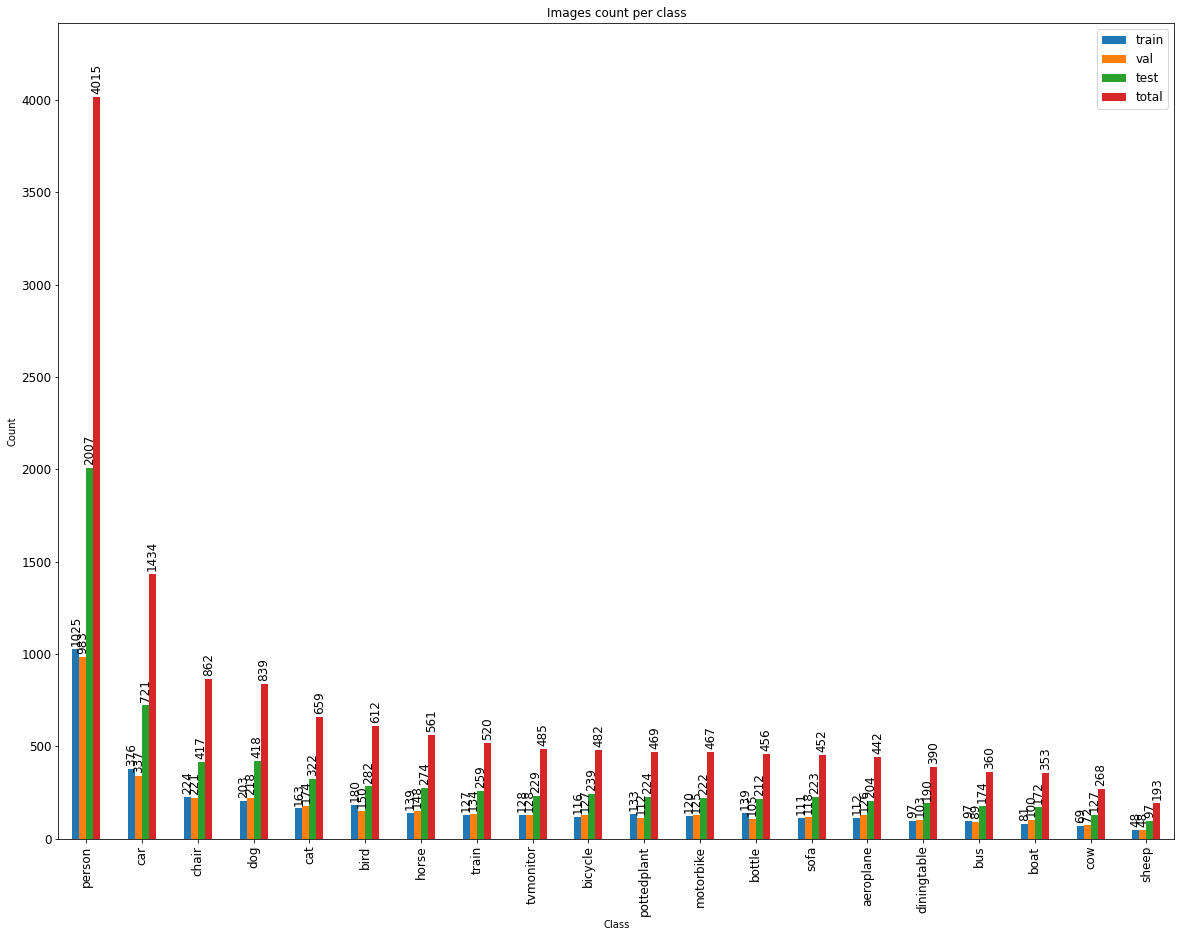

In [16]:
display_graph_of_images_count(df_class_count)

Most common class found in images by far is 'person'. Next are car, chair and dog.

The least amount of images depict sheeps with only 193 images in total of around 10k of images! Other classes are also not faring better. 

The distribution of class across train/val/test sets is almost equal. 
E.g.: Class 'person' appear in:
    
    * 1025 images in train set
    * 985 images in validation set
    * 2007 images in test set, which consists of 50% of all images

## Load images

In [17]:
# df_train.iloc[:, 1:]

In [18]:
# df_train.iloc[:, 0].loc[0]

In [19]:
# # classes in image 000012.jpg
# ds = df_train.iloc[0, 1:]
# ds

In [20]:
# file_name = df_train.iloc[0, 0]
# file_name

In [21]:
classes = list(df_train.iloc[:, 1:])
NUM_CLASSES = len(classes)
classes

['aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'person',
 'pottedplant',
 'sheep',
 'sofa',
 'train',
 'tvmonitor']

In [22]:
# ds_as_list = list(ds)

In [23]:
# ds_as_list

In [24]:
# def to_categorical(labels_list, n_classes=NUM_CLASSES):
    
#     labels = []
    
#     for i, cls in enumerate(labels_list):
        
#         if cls == 1:
            
#             labels.append(i)
    
#     Y = tf.keras.utils.to_categorical(labels, n_classes)
    
#     Y = tf.one_hot(labels_list, n_classes)
    
#     return Y
    

In [25]:
def get_img_paths_labels(dataframe, images_folder_path): 
    
    '''
    Get lists of paths to images and their corresponding labels
    
    Args:
        dataframe: pandas dataframe
        images_folder_path: path to folder with images
    '''
    
    set_paths = []
    set_labels = []

    for i in range(len(dataframe)):

        path = f'{images_folder_path}{dataframe.iloc[i, 0]}.jpg'
        set_paths.append(path)

        set_labels.append(list(dataframe.iloc[i, 1:]))
        
    
    return set_paths, set_labels

## Create Dataset

In [26]:
IMG_SIZE = 384

CHANNELS = 3

BATCH_SIZE = 32

SHUFFLE_BUFFER_SIZE = 512

AUTOTUNE = tf.data.AUTOTUNE

In [27]:
def parse_image(file_path, label):
    """
    Function that returns a tuple of normalized image array and labels array.
    
    Args:
        file_path: string representing path to image
        label: 0/1 one-dimensional array of size N_LABELS
    """
    
    # Read an image from a file
    image_string = tf.io.read_file(file_path)
    
    # Decode it into a dense vector
    image_decoded = tf.image.decode_jpeg(image_string, channels=CHANNELS)
    
    # Resize it to fixed shape
    image_resized = tf.image.resize(image_decoded, [IMG_SIZE, IMG_SIZE])
    
    # Normalize it from [0, 255] to [0.0, 1.0]
    image_normalized = image_resized / 255.0
    
    label = tf.cast(label, dtype=tf.float32)

    
    return image_normalized, label

In [28]:
def get_img_paths_and_labels(dataframe, images_folder_path): 
    
    '''
    Get lists of paths to images and their corresponding labels
    
    Args:
        dataframe: pandas dataframe
        images_folder_path: path to folder with images
    '''
    
    set_paths = []
    set_labels = []

    for i in range(len(dataframe)):

        path = f'{images_folder_path}{dataframe.iloc[i, 0]}.jpg'
        set_paths.append(path)

        set_labels.append(list(dataframe.iloc[i, 1:]))
    
    return set_paths, set_labels

In [29]:
def create_dataset(dataframe, images_folder_path, is_training=True):
    """
    Load and parse dataset.
    
    Args:
        dataframe: pandas dataframe
        images_folder_path: path to folder with images
        is_training: boolean to indicate training mode
    """
    
    filepaths, labels = get_img_paths_and_labels(dataframe, images_folder_path)
    
    # Create a first dataset of file paths and labels
    dataset = tf.data.Dataset.from_tensor_slices((filepaths, labels))
    
    # Parse and preprocess observations in parallel
    dataset = dataset.map(parse_image, num_parallel_calls=AUTOTUNE)

    
    if is_training == True:
    
        # This is a small dataset, only load it once, and keep it in memory.
        dataset = dataset.cache()
        
        # Shuffle the data each buffer size
        dataset = dataset.shuffle(buffer_size=SHUFFLE_BUFFER_SIZE)
        
    # Batch the data for multiple steps
    dataset = dataset.batch(BATCH_SIZE)
    
    # Fetch batches in the background while the model is training.
    dataset = dataset.prefetch(buffer_size=AUTOTUNE)
    
    return dataset

In [30]:
trainval_images_path = './data/VOCdevkit/VOC2007/JPEGImages/'
test_images_path = './data/VOCtest_06-Nov-2007/VOCdevkit/VOC2007/JPEGImages/'  

In [31]:
train_ds = create_dataset(df_train, trainval_images_path)
train_ds

<PrefetchDataset shapes: ((None, 384, 384, 3), (None, 20)), types: (tf.float32, tf.float32)>

In [32]:
val_ds = create_dataset(df_val, trainval_images_path)
test_ds = create_dataset(df_test, test_images_path)

## Load TensorBoard

In [33]:
import datetime

In [34]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Clear any tensorboard's logs from previous runs
! rm -rf ./logs/fit_ex3

# Deep learning model 

## Callbacks and F1 metric

In [35]:
def best_val_macro_f1_callback(filepath):
    
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=filepath,
        save_weights_only=True,
        monitor='val_macro_f1',
        mode='max',
        save_best_only=True,
        verbose=1)
    
    return checkpoint_callback

In [36]:
# path to best trained weights
checkpoint_path = './saved_weights/flowers/voc2007_transfer_learning'

best_val_macro_f1_acc = best_val_macro_f1_callback(checkpoint_path)

# callback for monitoring val_loss and for stopping in case of no improvement
# for example when overfitting occurs
early_stopping_val_loss = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

early_stopping_val_f1 = tf.keras.callbacks.EarlyStopping(monitor='val_macro_f1', 
                                                         mode='max', 
                                                         patience=3)

# tensorboard callback
log_dir = "logs/fit_ex3/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [37]:
def macro_f1(y, y_hat, thresh=0.5):
    """Compute the macro F1-score on a batch of observations (average F1 across labels)
    
    Args:
        y (int32 Tensor): labels array of shape (BATCH_SIZE, N_LABELS)
        y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)
        thresh: probability value above which we predict positive
        
    Returns:
        macro_f1 (scalar Tensor): value of macro F1 for the batch
    """
    y_pred = tf.cast(tf.greater(y_hat, thresh), tf.float32)
    tp = tf.cast(tf.math.count_nonzero(y_pred * y, axis=0), tf.float32)
    fp = tf.cast(tf.math.count_nonzero(y_pred * (1 - y), axis=0), tf.float32)
    fn = tf.cast(tf.math.count_nonzero((1 - y_pred) * y, axis=0), tf.float32)
    f1 = 2*tp / (2*tp + fn + fp + 1e-16)
    macro_f1 = tf.reduce_mean(f1)
    return macro_f1

## Set convolution base

In [38]:
# conv_base = tf.keras.applications.InceptionResNetV2(weights='imagenet',
#                                                     include_top=False,
#                                                     input_shape=(IMG_SIZE, IMG_SIZE, 3))

# conv_base.trainable = False
# print("weights:", len(conv_base.weights))
# print("trainable_weights:", len(conv_base.trainable_weights))
# print("non_trainable_weights:", len(conv_base.non_trainable_weights))

### Justification for the selection of the pre-trained model and weights

For this project I chose [EfficientNet V2](https://arxiv.org/abs/2104.00298) architecture which was designed for image classification and has weights trained on [ILSVRC-2012-CLS](https://image-net.org/challenges/LSVRC/2012/index.php) dataset. 

Therefore even though weights were train for multi-class image classication, they are perfectly usable in multi-label classification, when only convolution part is being used.  

Convolution base is not trainable as to lower computation cost.

Model ia available [here](https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/classification/2).

In [39]:
import tensorflow_hub as hub

feature_extractor_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/classification/2"

conv_base = hub.KerasLayer(feature_extractor_url, 
                           input_shape=(IMG_SIZE,IMG_SIZE,CHANNELS))

conv_base.trainable = False

## Define model architecture and compile

In [40]:
model = tf.keras.models.Sequential([
    
    conv_base,
    
    layers.Flatten(),
    
    layers.Dense(1024, activation='relu'),
    
    layers.Dense(1024, activation='relu'),
    
    layers.Dense(512, activation='relu'),
 
    layers.Dense(NUM_CLASSES, activation='sigmoid', name='output')
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1000)              21612360  
_________________________________________________________________
flatten (Flatten)            (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1025024   
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
output (Dense)               (None, 20)                10260     
Total params: 24,222,044
Trainable params: 2,609,684
Non-trainable params: 21,612,360
____________________________________

In [41]:
# Source:
# https://gist.github.com/ashrefm/3ff9668a9f157008d4c712f3105d5842

def macro_soft_f1(y, y_hat):
    """Compute the macro soft F1-score as a cost.
    Average (1 - soft-F1) across all labels.
    Use probability values instead of binary predictions.
    
    Args:
        y (int32 Tensor): targets array of shape (BATCH_SIZE, N_LABELS)
        y_hat (float32 Tensor): probability matrix of shape (BATCH_SIZE, N_LABELS)
        
    Returns:
        cost (scalar Tensor): value of the cost function for the batch
    """
    
    y = tf.cast(y, tf.float32)
    y_hat = tf.cast(y_hat, tf.float32)
    tp = tf.reduce_sum(y_hat * y, axis=0)
    fp = tf.reduce_sum(y_hat * (1 - y), axis=0)
    fn = tf.reduce_sum((1 - y_hat) * y, axis=0)
    soft_f1 = 2*tp / (2*tp + fn + fp + 1e-16)
    cost = 1 - soft_f1 # reduce 1 - soft-f1 in order to increase soft-f1
    macro_cost = tf.reduce_mean(cost) # average on all labels
    
    return macro_cost

In [42]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             loss=macro_soft_f1,
             metrics=['accuracy', macro_f1])

## Fit the model

In [43]:
EPOCHS = 30

# train model
history = model.fit(train_ds,
                   validation_data=val_ds,
                   epochs=EPOCHS,
                   callbacks=[best_val_macro_f1_acc, 
                              early_stopping_val_f1,
                              tensorboard_callback])

Epoch 1/30
79/79 [==============================] - 56s 547ms/step - loss: 0.6292 - accuracy: 0.4186 - macro_f1: 0.4573 - val_loss: 0.3990 - val_accuracy: 0.7311 - val_macro_f1: 0.6324

Epoch 00001: val_macro_f1 improved from -inf to 0.63236, saving model to ./saved_weights/flowers/voc2007_transfer_learning
Epoch 2/30
79/79 [==============================] - 39s 490ms/step - loss: 0.3712 - accuracy: 0.7925 - macro_f1: 0.6439 - val_loss: 0.3688 - val_accuracy: 0.7733 - val_macro_f1: 0.6409

Epoch 00002: val_macro_f1 improved from 0.63236 to 0.64094, saving model to ./saved_weights/flowers/voc2007_transfer_learning
Epoch 3/30
79/79 [==============================] - 39s 495ms/step - loss: 0.3445 - accuracy: 0.7937 - macro_f1: 0.6642 - val_loss: 0.3652 - val_accuracy: 0.7769 - val_macro_f1: 0.6441

Epoch 00003: val_macro_f1 improved from 0.64094 to 0.64410, saving model to ./saved_weights/flowers/voc2007_transfer_learning
Epoch 4/30
79/79 [==============================] - 39s 495ms/step 

# Model evaluation

In [44]:
# load best weights
model.load_weights(checkpoint_path)

In [45]:
model.evaluate(test_ds)

155/155 [==============================] - 41s 262ms/step - loss: 0.3568 - accuracy: 0.7924 - macro_f1: 0.6468


[0.3568241000175476, 0.7924070954322815, 0.6467871069908142]

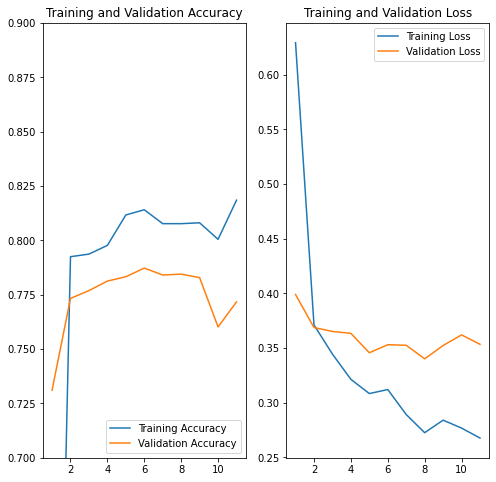

In [61]:
def display_plots(history_var, epochs=len(history.epoch)):
    acc = history_var.history['accuracy']
    val_acc = history_var.history['val_accuracy']

    loss = history_var.history['loss']
    val_loss = history_var.history['val_loss']

    epochs_range = range(1, epochs+1)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.ylim(0.7, 0.9)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
    
    

display_plots(history)

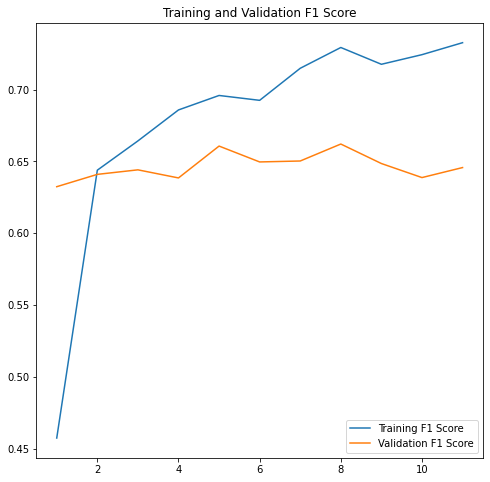

In [47]:
def display_f1(history_var, epochs=len(history.epoch)):
    
    f1 = history_var.history['macro_f1']
    val_f1 = history_var.history['val_macro_f1']

    epochs_range = range(1, epochs+1)
    plt.figure(figsize=(8, 8))
    plt.plot(epochs_range, f1, label='Training F1 Score')
    plt.plot(epochs_range, val_f1, label='Validation F1 Score')
    plt.legend(loc='lower right')
    plt.title('Training and Validation F1 Score')
    
    

display_f1(history)

## Tensorboard

In [3]:
%load_ext tensorboard
%tensorboard --logdir logs/fit_ex3/

Reusing TensorBoard on port 6008 (pid 23310), started 0:03:25 ago. (Use '!kill 23310' to kill it.)

## Charts from TensorBoard

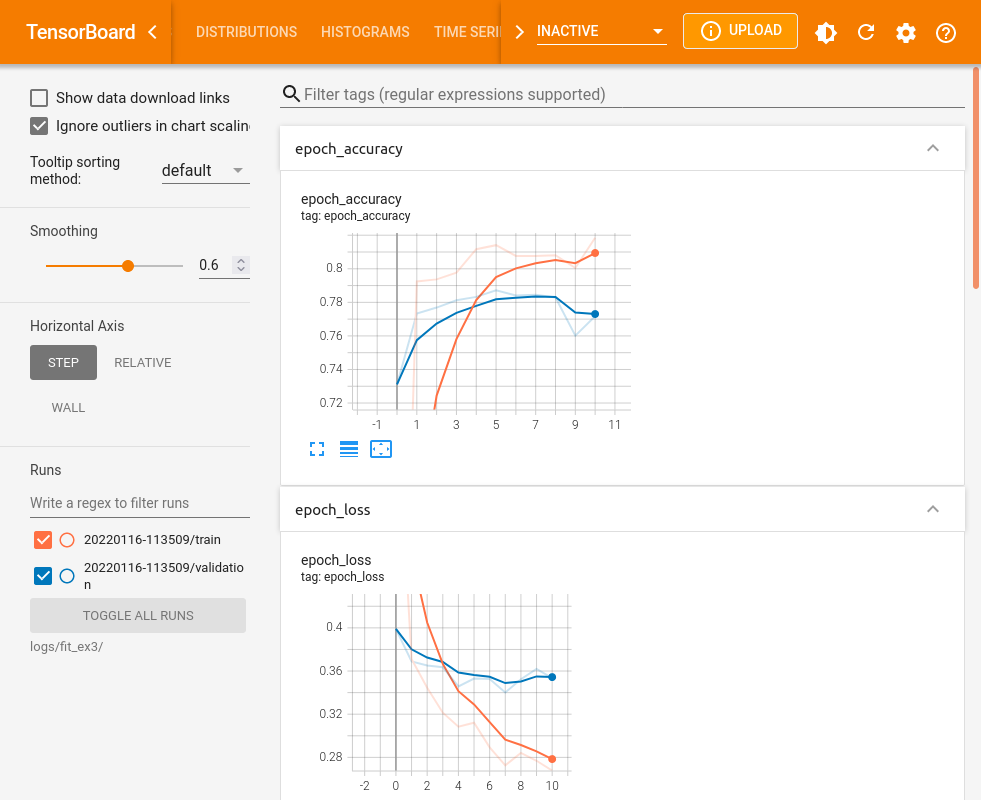

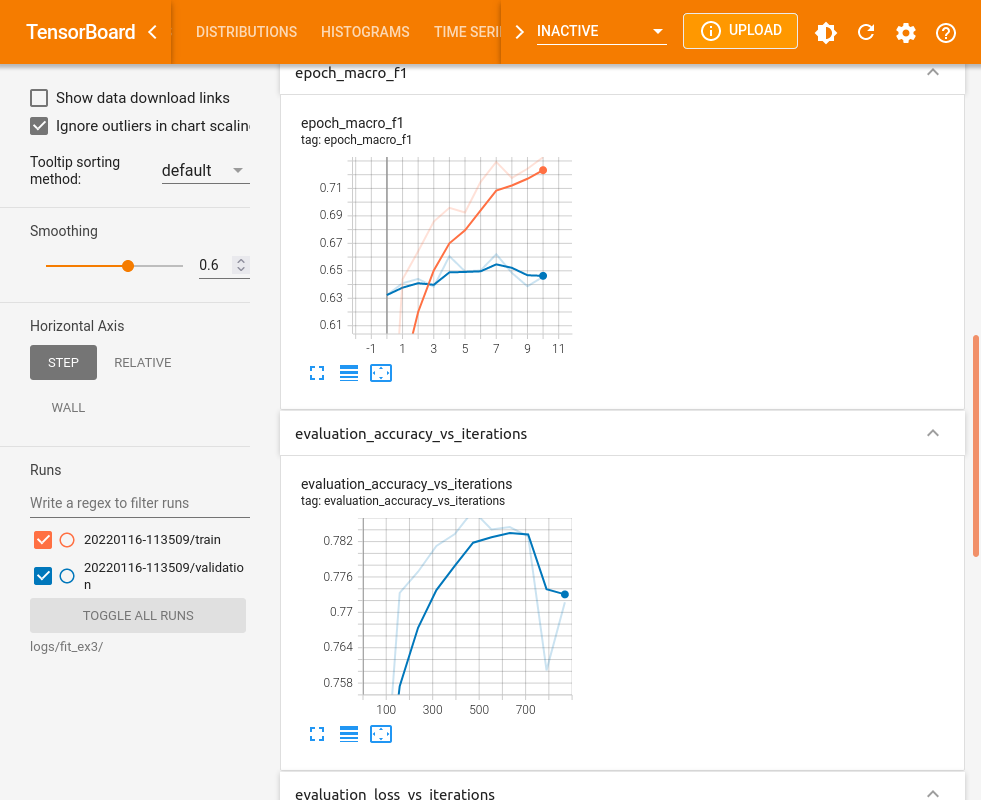

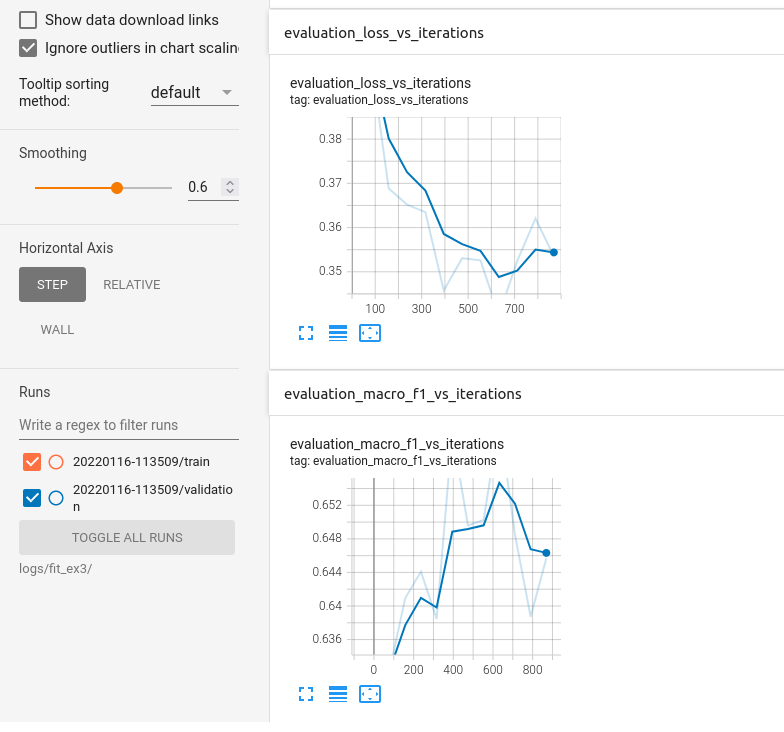

## Display predictions

In [48]:
batch_ds = test_ds.take(1)

In [49]:
# y_true = np.concatenate([y for x, y in batch_ds], axis=0)
# images = np.concatenate([x for x, y in batch_ds], axis=0)

for images, labels in batch_ds:  # only take first element of dataset
    images = images.numpy()
    y_true = labels.numpy()
    predictions = model.predict(images)

In [50]:
img_no = 4

In [51]:
y_true[img_no] 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0.], dtype=float32)

In [52]:
np.argwhere(y_true[img_no] == 1.0)

array([[14]])

In [53]:
for idx in np.argwhere(y_true[img_no] == 1.0):
    print(classes[int(idx)])

person


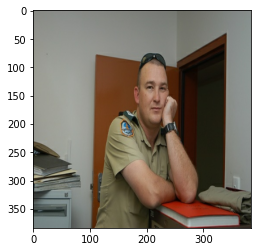

In [54]:
plt.imshow(images[img_no])

In [55]:
indexes = np.argwhere(predictions[img_no] > 0.5)

for idx in indexes:
    print(classes[int(idx)])

person
tvmonitor


## Random images and their predictions

In [56]:
from random import sample

def generate_random_numbers(batch_size=BATCH_SIZE, amount=6, classes=classes):
    
    return sample(range(0, batch_size-1), amount)
    

def display_random_predictions_in_batch(batch_data=batch_ds, 
                                        images_no=generate_random_numbers(amount=8)):
    
    '''
    Displays real image, real labels and predicted labels.
    
    
    '''
    
#     y_true = np.concatenate([y for x, y in batch_data], axis=0)
#     images = np.concatenate([x for x, y in batch_data], axis=0)

    for images, labels in batch_ds:  # only take first element of dataset
        images = images.numpy()
        y_true = labels.numpy()
        predictions = model.predict(images)
    
    true_classes = {}
    pred_classes = {}
    
    for img_no in images_no:
        
        true_classes[img_no] = []
        pred_classes[img_no] = []
    
        for idx in np.argwhere(y_true[img_no] == 1.0):
            true_classes[img_no].append(classes[int(idx)])

        for idx in np.argwhere(predictions[img_no] > 0.5):
            pred_classes[img_no].append(classes[int(idx)])
    
    rows = int(len(images_no) / 2)
    cols = int(len(images_no) / rows)
    
    
          
    try:
        
        plt.figure(figsize=(cols*4, rows*4))
        
        for i, no in enumerate(images_no):
            
            ax = plt.subplot(rows, cols, i + 1)
            plt.imshow(images[no])
            plt.title(f'True: {true_classes[no]}\nPredicted: {pred_classes[no]}')
            plt.axis("off")
    
    except ValueError:
        
        pass

## Tensorboard

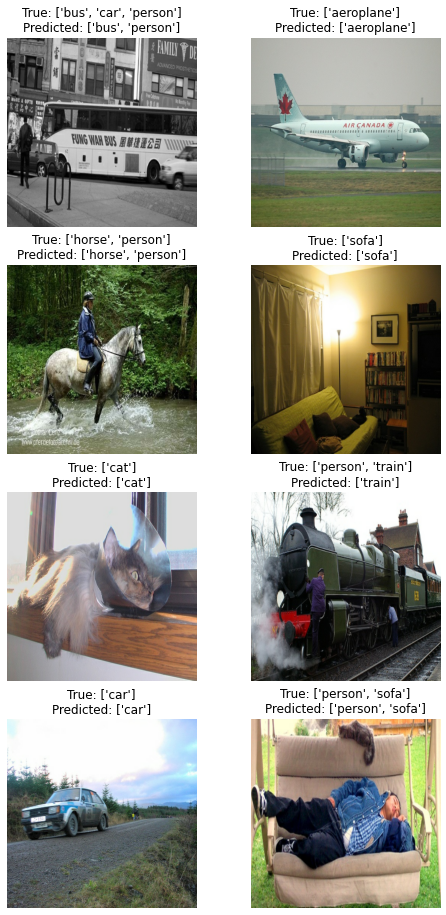

In [62]:
one_batch = test_ds.take(1)

display_random_predictions_in_batch(one_batch)

# Conclusions

Model was build with EfficientNet V2 convolution layers with fronen weights and top which included four Dense layeres.

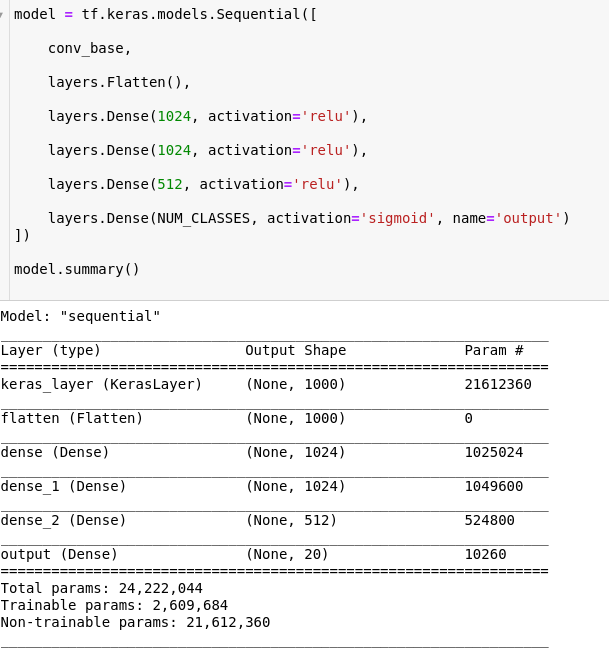

Callbacks for early stopping and saving best weights were passed to model.fit(), which allowed to retrieve model's weights with best perfomance and prevent futile training when overfitting occured.

Model [F1-Score](https://en.wikipedia.org/wiki/F-score) = 0.6468 on test set is satisfactory.

Nevertheless, way to improve performance would be adding data augmentation, which would prefent overfitting and probably allow to reach even better score.

In eight pictures above, only two predictions are lacking:

A | B
- | - 
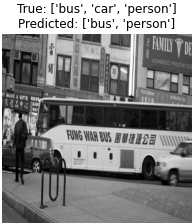 | 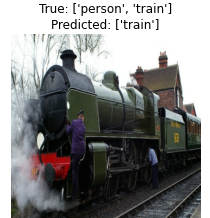

In picture A car are either covered by human or not wholly visible and bus behind it, albeit model should make better prediction in this case.  

In picture B there are two people showing their backs. Moreover their clothes do not differentiate them from train. 

In [9]:
# export notebook to html

os.system('jupyter nbconvert --to html Tabaka_Marcin_Transfer_learning.ipynb')

0